# Starter Classes

These are classes that will be used throughout the project. 

In [2]:
#All neccesary classes for project

#general
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores

import matplotlib.pyplot as plt

# Import Data

Here we will import the data, view it, and scale it as well as impute missing values

In [21]:
#import Data from Experiment
raw_data = import_data("Out_Of_Set_Tan_Final.csv", "C:/Users/sdgeo/Dropbox/Own/Graduate-School/First_Semester/COMP_790/workspace/out_of_sample/c_tan_data") 

#Do Any reformatting on raw_data
cleaned_data_f = raw_data


In [32]:
#Make column for comparing in-vs-out data
likelihood_data = cleaned_data_f[['Correct_Category','In-Likelihood','Out-Likelihood']]
likelihood_horse = likelihood_data.loc[likelihood_data['Correct_Category'] == 'airplane']
likelihood_data.describe()
likelihood_horse.describe()

,In-Likelihood,Out-Likelihood
count,747.000000,0.0
mean,30.596485,NaN
std,49.098951,NaN
min,-147.755234,NaN
25%,-6.692505,NaN
50%,28.582649,NaN
75%,69.846466,NaN
max,123.729736,NaN


In [14]:
category_likes = cleaned_data_f[['Correct_Category','Likelihood']]
category_likes.describe()

,Likelihood
count,10889.000000
mean,-23.559534
std,31.757751
min,-199.939423
25%,-41.274887
50%,-25.427582
75%,-9.378876
max,123.729736


In [17]:
#Import Labels for all the classes
labels_file_all = "D:/Machine_Learning/Datasets/ten_class_classifier/labels.txt"
class_file_all = open(labels_file_all,'r')
labels_all = class_file_all.read().split('\n')
labels_all

['airplane',
 'horse',
 'book',
 'cake',
 'car',
 'cat',
 'dog',
 'laptop',
 'pizza',
 'zebra']

In [19]:
#Build a frame of class by class average
column_list = ['Class', 'Average']
average_data_frame = pd.DataFrame(columns=column_list)

for i in labels_all:
    current_frame = cleaned_likes.loc[cleaned_likes['Correct_Category'] == i]
    mean = current_frame.mean()[0]
    
    to_add = pd.DataFrame([[i,mean]], columns = column_list)
    average_data_frame = average_data_frame.append(to_add)
    
average_data_frame

,Class,Average
0,airplane,30.596485
0,horse,-14.072457
0,book,-27.252539
0,cake,-35.955237
0,car,-29.010843
0,cat,-31.037062
0,dog,-33.129841
0,laptop,-26.990951
0,pizza,-34.114560
0,zebra,3.230471


# Plots and Graphs

Using the frames above we can create the plots we need for viewing the data

In [24]:
#Show the histograms for all the 
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data_f.reindex(sorted(cleaned_data_f.columns), axis=1)
cleaned_data_f.hist(bins=50, figsize=(150,130))
plt.show()

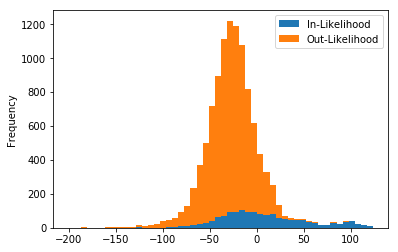

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
likelihood_data.reindex(sorted(likelihood_data.columns), axis=1)
likelihood_data.plot.hist(bins=50, stacked=True, legend=True)
plt.savefig('hist_likelihoods.jpeg')
plt.show()

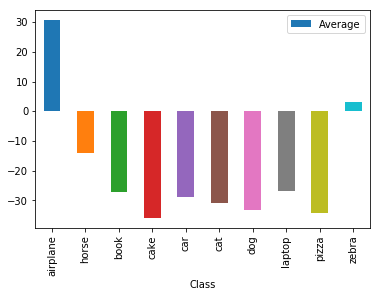

In [27]:
#Bar Graph of classes
%matplotlib inline
import matplotlib.pyplot as plt
average_data_frame.reindex(sorted(average_data_frame.columns), axis=1)
average_data_frame.plot.bar(x='Class',y='Average')
plt.savefig('bar_cat.jpeg')
plt.show()

In [3]:
mean_data = cleaned_data_f[['In-vs-Out','Mean_Part']]
median_data = cleaned_data_f[['In-vs-Out','Min_Part']]
quarter_data = cleaned_data_f[['In-vs-Out','Quarter_Part']]
mean_data.count()[0]

10020

NameError: name 'labels_all' is not defined

In [110]:
#Get Data
horse_frame = current_frame = cleaned_likes.loc[cleaned_likes['Correct_Category'] == 'horse']
horse_frame.quantile(0.25)

Likelihood   -50.892262
Name: 0.25, dtype: float64



Cleaned data item:
cleaned_data

In [4]:
cleaned_data_f

,Item_Number,file,Correct_Category,Estimated_Category,Max_Softmax_Value,Likelihood,In-vs-Out,In-Likelihood,Out-Likelihood,Mean_Part,Min_Part,Quarter_Part
0,0,000000228122.jpg,car,airplane,1.000000,42.196045,Out,NaN,42.196045,In,In,In
1,1,000000449307.jpg,dog,horse,0.999012,-4.945770,Out,NaN,-4.945770,In,In,In
2,2,000000518318.jpg,car,airplane,1.000000,-102.750198,Out,NaN,-102.750198,Out,Out,Out
3,3,000000219269.jpg,laptop,airplane,0.966397,-69.894241,Out,NaN,-69.894241,Out,Out,Out
4,4,000000335106.jpg,zebra,horse,0.999030,88.839523,Out,NaN,88.839523,In,In,In
5,5,000000507266.jpg,cat,horse,1.000000,-107.268982,Out,NaN,-107.268982,Out,Out,Out
6,6,000000196506.jpg,cake,horse,0.999999,-143.403107,Out,NaN,-143.403107,Out,Out,Out
7,7,000000103877.jpg,cat,horse,0.940300,-76.007263,Out,NaN,-76.007263,Out,Out,Out
8,8,000000229035.jpg,laptop,airplane,0.997481,-21.218063,Out,NaN,-21.218063,Out,Out,In
9,9,000000302928.jpg,laptop,airplane,0.993888,-38.181366,Out,NaN,-38.181366,Out,Out,In


In [24]:
cleaned_data.describe()

,Item_Number,Max_Softmax_Value,Likelihood
count,9990.000000,9990.000000,9990.000000
mean,4994.500000,0.947428,-45.300444
std,2884.008929,0.110974,52.712472
min,0.000000,0.500269,-182.867783
25%,2497.250000,0.968039,-81.729908
50%,4994.500000,0.999443,-57.879257
75%,7491.750000,0.999997,-24.466026
max,9989.000000,1.000000,126.727081


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.hist(bins=50, figsize=(150,130))
plt.savefig('hist_categories.jpeg')
plt.show()

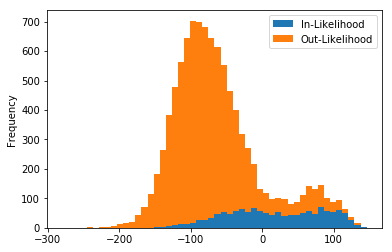

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.plot.hist(bins=50, stacked=True, legend=True)
plt.savefig('hist_likelihoods.jpeg')
plt.show()

In [39]:
labels_file_all = "D:/Machine_Learning/Datasets/ten_class_classifier/labels.txt"


class_file_all = open(labels_file_all,'r')
class_list_all = class_file_all.read().split('\n')
labels_all = class_list_all
labels_all

['airplane',
 'horse',
 'book',
 'cake',
 'car',
 'cat',
 'dog',
 'laptop',
 'pizza',
 'zebra']

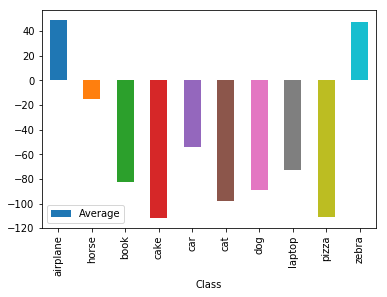

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
average_data_frame.reindex(sorted(average_data_frame.columns), axis=1)
average_data_frame.plot.bar(x='Class',y='Average')
plt.savefig('bar_cat.jpeg')
plt.show()

In [100]:
average_data_frame

,Class,Average
0,airplane,48.842840
0,horse,-15.139581
0,book,-82.235914
0,cake,-111.785151
0,car,-54.391081
0,cat,-97.878257
0,dog,-89.199862
0,laptop,-72.945765
0,pizza,-110.731967
0,zebra,47.142435


In [7]:
corr_matrix = cleaned_data.corr()

In [6]:
corr_matrix_spear = cleaned_data_f.corr(method='spearman')
corr_matrix_spear.reindex(sorted(corr_matrix_spear.columns), axis=1)
pvalue_matrix_spear = pd.DataFrame(ss.spearmanr(cleaned_data_f).pvalue)
corr_matrix_spear

c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Item_Number,Max_Softmax_Value,Likelihood,In-Likelihood,Out-Likelihood
Item_Number,1.000000,-0.008482,0.005877,-0.001086,0.004166
Max_Softmax_Value,-0.008482,1.000000,0.260206,0.069476,0.102899
Likelihood,0.005877,0.260206,1.000000,1.000000,1.000000
In-Likelihood,-0.001086,0.069476,1.000000,1.000000,NaN
Out-Likelihood,0.004166,0.102899,1.000000,NaN,1.000000


In [ ]:

#color pallete used for all heatmaps
pls = sns.husl_palette(8, s=.45)

#overall cluster map
dims = (100, 100)
sns_whole = sns.clustermap(corr_matrix_spear, figsize=dims, cmap="vlag")
sns_whole.savefig("correlation_map.png", dpi = 'figure')

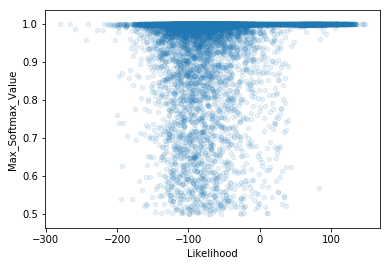

In [7]:
%matplotlib inline
cleaned_data_f.plot(kind="scatter", x="Likelihood", y="Max_Softmax_Value", alpha=0.1)
plt.savefig('Correlation_Correct_Softmax.jpeg')
plt.show()

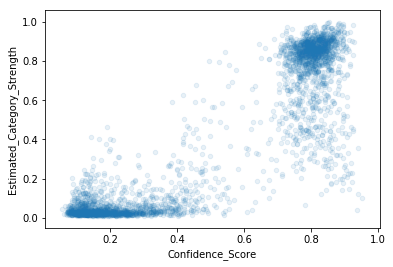

In [55]:
%matplotlib inline
cleaned_data.plot(kind="scatter", x="Confidence_Score", y="Estimated_Category_Strength", alpha=0.1)
plt.savefig('Correlation_Strongest_Category.jpeg')
plt.show()

In [34]:
confidence_compare

,Max_Confidence_Index_Value,Correct_Confidence
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [134]:
#In-V-Out Accuracy

confidence_matrix = mean_data.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, mean_data.count()[0],0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,mean_data.count()[0],0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.8560878243512974

In [133]:
#In-V-Out Accuracy

confidence_matrix = median_data.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, mean_data.count()[0],0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,mean_data.count()[0],0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.8523952095808384

In [131]:
#In-V-Out Accuracy

confidence_matrix = quarter_data.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, mean_data.count()[0],0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,mean_data.count()[0],0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.7473053892215569

In [123]:
#Calculate in/out Accuracy

confidence_matrix = confidence_compare.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, 3000,0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,3000,0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

NameError: name 'confidence_compare' is not defined

In [11]:
#Calculate in/out Accuracy

confidence_matrix = blur_compare.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, 1500,0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,1500,0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.021333333333333333